In [20]:
import datetime
import json
import io
import logging
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sms
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import statsmodels.tsa.stattools as smt


In [2]:
crimes_merged = pd.read_csv('merged_file_weather+daily_counts.csv')

In [3]:
cleaned_crimes_merged = crimes_merged.dropna()

In [4]:
cleaned_crimes_merged.head()

,ID,Date,NumberofCrimes,Temp
0,1,1/1/2001,1831,-9.0
1,2,1/2/2001,1143,-11.0
2,3,1/3/2001,1151,-8.0
3,4,1/4/2001,1166,-4.0
4,5,1/5/2001,1267,-1.0


In [17]:
cleaned_crimes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8651 entries, 0 to 8650
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              8651 non-null   int64         
 1   Date            8651 non-null   datetime64[ns]
 2   NumberofCrimes  8651 non-null   int64         
 3   Temp            8651 non-null   float64       
 4   Month           8651 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 371.7 KB


In [ ]:
# Convert Date column to datetime
cleaned_crimes_merged['Date'] = pd.to_datetime(cleaned_crimes_merged['Date'])


In [ ]:
# Extract month from Date
cleaned_crimes_merged['Month'] = cleaned_crimes_merged['Date'].dt.month


In [8]:
#Aggregate data by month across all years:
monthly_data = cleaned_crimes_merged.groupby('Month').agg({'Temp': 'mean', 'NumberofCrimes': 'mean'}).reset_index()


In [22]:
monthly_data.head(15)

,Month,Temp,NumberofCrimes
0,1,-3.654570,863.672043
1,2,-2.390855,837.616519
2,3,3.591398,902.611559
3,4,9.325000,928.547222
4,5,15.233871,978.891129
5,6,20.933333,1010.793056
6,7,23.426075,1028.822581
7,8,22.713710,1018.442204
8,9,18.758967,999.469154
9,10,11.562412,981.171108


In [ ]:
#Plot the monthly trends:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'], monthly_data['NumberofCrimes'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Crime Rate vs Temperature')
plt.xlabel('Month')
plt.ylabel('Average Crime Rate')
plt.grid(True)
plt.show()

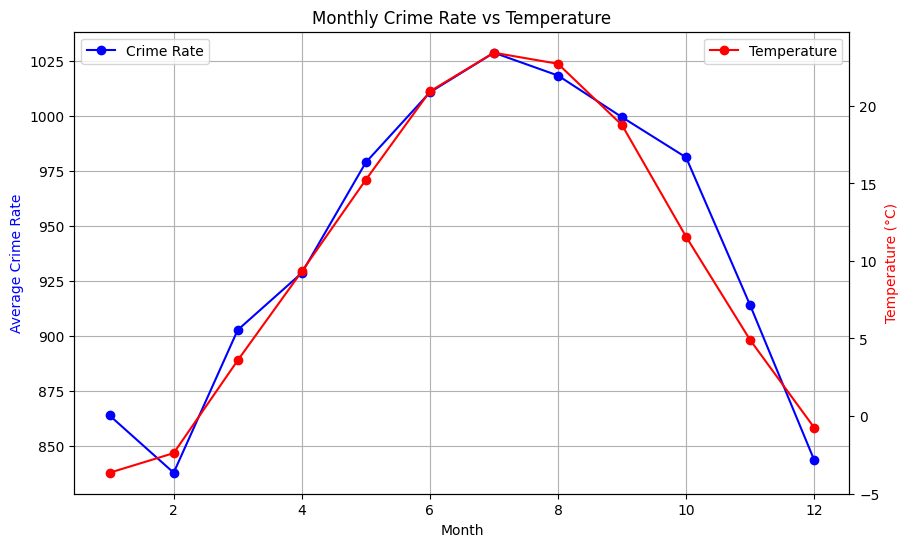

In [23]:

plt.figure(figsize=(10, 6))

# Plotting crime rate
plt.plot(monthly_data['Month'], monthly_data['NumberofCrimes'], marker='o', linestyle='-', color='blue', label='Crime Rate')

# Creating a secondary y-axis for temperature
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(monthly_data['Month'], monthly_data['Temp'], marker='o', linestyle='-', color='red', label='Temperature')

# Adding titles and labels
plt.title('Monthly Crime Rate vs Temperature')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Crime Rate', color='blue')
ax2.set_ylabel('Temperature (°C)', color='red')

# Adding grid and legend
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


The above plot shows that as the temperatures rise the rate of crime also increases.